In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Monte Carlo Simulations in Poker (Texas Hold 'Em) by Ritwik Dixit ##


### I investigate the following distributions: ###
### 1. Distribution of Hands ###
### 2. Distribution of Hands of Winners of each Deal ###
### 3. Distribution of Expected Results given nothing on the Flop ###
### 4. Distribution of Expected Results given Pocket Pair ### 

# Enumerations and Definitions #

In [2]:
# numbers

ACE = 1
JACK = 11
QUEEN = 12
KING = 13
names = [0, 'Ace', 2, 3, 4, 5, 6, 7, 8, 9, 10, 'Jack', 'Queen', 'King']

# suits

Clubs = 1
Hearts = 2
Diamonds = 3
Spades = 4

suits = [0, 'Clubs', 'Hearts', 'Diamonds', 'Spades']

def name(card):
    return names[card]

deck = []

for i in range(1, 14):
    deck.extend([(i, 1), (i, 2), (i, 3), (i, 4)])
    
np.random.shuffle(deck)
print(deck)
print(len(deck))

[(4, 1), (11, 3), (1, 3), (3, 4), (12, 1), (11, 4), (1, 1), (8, 1), (8, 3), (6, 3), (6, 2), (10, 2), (12, 3), (11, 2), (13, 3), (7, 3), (4, 3), (9, 1), (2, 2), (6, 1), (4, 2), (10, 1), (1, 4), (8, 4), (12, 2), (13, 4), (9, 2), (7, 4), (8, 2), (2, 4), (5, 4), (4, 4), (1, 2), (5, 1), (12, 4), (9, 4), (2, 3), (2, 1), (3, 3), (9, 3), (10, 4), (13, 2), (7, 2), (5, 2), (10, 3), (11, 1), (3, 1), (3, 2), (13, 1), (7, 1), (6, 4), (5, 3)]
52


In [3]:
players = 5

In [4]:
straight_flush = 9
four_of_a_kind = 8
full_house = 7
flush = 6
straight = 5
three_of_a_kind = 4
two_pair = 3
pair = 2
high_card = 1

rankings = ['', 'high card', 'pair', '2 pair', '3 of a kind', 'sraight', 'flush', 'full house', '4 of a kind', 'straight flush']

In [5]:
# returns a 2d array with the hand that each person has
def distribute(deck):
    hands = []
    for i in range(players):
        hands.append([deck[2*i], deck[2*i+1]])
    flop = deck[2*players:2*players + 5]
    return hands, flop

# Below I have a few helper functions in order to: #
## Judge hand: given the flop and a hand of a player, goes through the hands to determine which is the best one (i.e. straight, two pair) that can be made from the 7 cards. ##

In [6]:
# helper functions
def strArr(tup):
    return [str(names[t[0]]) + ' of ' + str(suits[t[1]]) for t in tup]
    
def printArr(tup):
    for i in range(len(tup)):
        print(names[tup[i][0]], 'of', suits[tup[i][1]])

def prints(arr, suitsArr, message):
    print('FLOP & HAND ---', message)
    for i in range(7):
        print(names[arr[i]], 'of', suits[suitsArr[i]])
    print('-----\n')

def frequency_analysis(arr):
    d = {}
    for card in arr:
        if card in d:
            d[card]+=1
        else:
            d[card]=1
    return list(d.keys()), list(d.values())

def is_straight(sc):
    #     2 3 4   <-- must be consecutive
    # 0 1 2
    #   1 2 ..4 5
    #         4 5 6
    if sc[2] + 1 != sc[3] or sc[3] + 1 != sc[4]:
        return False
    if sc[0] + 1 == sc[1] and sc[1] + 1 == sc[2]:
        return True
    if sc[1] + 1 == sc[2] and sc[4] + 1 == sc[5]:
        return True
    if sc[4] + 1 == sc[5] and sc[5] + 1 == sc[6]:
        return True
    return False

# suits array
def is_flush(ssf):
    return ssf[-1] >= 5

def is_straight_flush(f, h):
    fh = f+h
    fh = sorted(fh, key=lambda x: x[0])
    
    if fh[2][0] + 1 != fh[3][0] or fh[3][0] + 1 != fh[4][0]:
        return False
    
    if fh[0][0] + 1 == fh[1][0] and fh[1][0] + 1 == fh[2][0]:
        if fh[0][1] == fh[1][1] == fh[2][1] == fh[3][1] == fh[4][1]:
            return True
    if fh[1][0] + 1 == fh[2][0] and fh[4][0] + 1 == fh[5][0]:
        if fh[1][1] == fh[2][1] == fh[3][1] == fh[4][1] == fh[5][1]:
            return True
    if fh[4][0] + 1 == fh[5][0] and fh[5][0] + 1 == fh[6][0]:
        if fh[2][1] == fh[3][1] == fh[4][1] == fh[5][1] == fh[6][1]:
            return True
    
    return False
    

def unzip(arr):
    return [a[0] for a in arr], [a[1] for a in arr]

def judge_hand(f, h):
    flop, flop_suits = unzip(f)
    hand, hand_suits = unzip(h)
    
    arr = flop + hand
    suitsArr = flop_suits + hand_suits
    
    unique_cards, freqs = frequency_analysis(arr)
    unique_suits, suitfreqs = frequency_analysis(suitsArr)
    
    sorted_cards = sorted(arr)
    sorted_freqs =  sorted(freqs)
    
    sorted_suit_freqs = sorted(suitfreqs)
    
    straight = is_straight(sorted_cards)
    flush = is_flush(sorted_suit_freqs)
    
    if is_straight_flush(f, h):
        # prints(arr, suitsArr, 'straight flush!')
        return 9
    
    # 4 of a kind
    if sorted_freqs[-1] == 4:
        # prints(arr, suitsArr, '4 of a kind!')
        return 8
    
    # full house
    if sorted_freqs[-1] == 3 and sorted_freqs[-2] >= 2:
        # prints(arr, suitsArr, 'full house!')
        return 7
    
    # flush
    if flush:
        # prints(arr, suitsArr, 'flush!')
        return 6
    
    # straight
    if straight:
        # prints(arr, suitsArr, 'straight!')
        return 5
    
    # 3 of a kind
    if sorted_freqs[-1] == 3:
        # prints(arr, suitsArr, '3 of a kind!')
        return 4
    
    # 2 pair
    if sorted_freqs[-1] == 2 and sorted_freqs[-2] == 2:
        # prints(arr, suitsArr, '2 pair!')
        return 3
    
    # 1 pair
    if sorted_freqs[-1] == 2:
        # prints(arr, suitsArr, 'pair!')
        return 2
    
    # high card
    # prints(arr, suitsArr, 'high card.')
    return 1
    
    

In [7]:
stats = [0] * 10

In [8]:
def playRound(deck):
    np.random.shuffle(deck)
    hands, flop = distribute(deck)
    
    for hand in hands:
        s = judge_hand(flop, hand)
        stats[s] += 1
        

## Let's collect some statistics by Monte Carlo simulation (10000 rounds) on the frequencies of certain hands. ##

In [13]:
# here we simulate 10000 rounds!
for j in range(10000):
    playRound(deck)

In [9]:
import matplotlib.animation as animation

<BarContainer object of 10 artists>

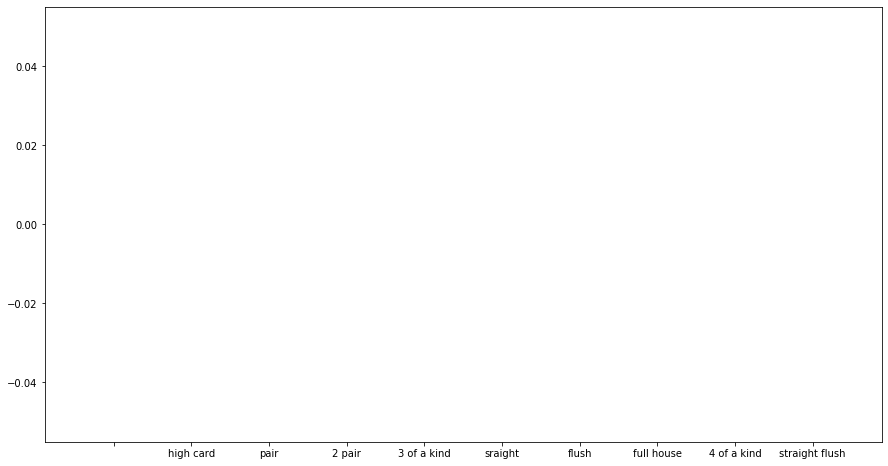

In [40]:
stats = [0] * 10

Writer = animation.writers['ffmpeg']
writer = Writer(fps=10, metadata=dict(artist='Me'), bitrate=1800)

fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(x=rankings, height=stats)

In [41]:
def animate(i):
    ax.clear()
    ax.bar(x=rankings, height=stats)
    ax.set_ylim([0, 1500])
    
    for j in range(10):
        playRound(deck)


ani = animation.FuncAnimation(fig, animate, frames = 50, repeat = True)
ani.save('poker.mp4', writer=writer)

In [14]:
# let's see the statistics
def showStats():
    total = sum(stats)
    for i in range(1, len(stats)):
        print(rankings[i], ':', stats[i], '   ', 100.0*stats[i]/total, '%')

In [15]:
showStats()

high card : 17679     17.679 %
pair : 44844     44.844 %
2 pair : 23559     23.559 %
3 of a kind : 4793     4.793 %
sraight : 3288     3.288 %
flush : 3004     3.004 %
full house : 2653     2.653 %
4 of a kind : 159     0.159 %
straight flush : 21     0.021 %


In [16]:
print('cumulative numbers P(getting greater than or equal than a certain amount):')
total = sum(stats)
for i in range(1, len(stats)):
    print(rankings[i], ':', 100.0*sum(stats[i:])/total, '%')

cumulative numbers P(getting greater than or equal than a certain amount):
high card : 100.0 %
pair : 82.321 %
2 pair : 37.477 %
3 of a kind : 13.918 %
sraight : 9.125 %
flush : 5.837 %
full house : 2.833 %
4 of a kind : 0.18 %
straight flush : 0.021 %


### Observations: pairs and 2 pairs are quite common! Don't bet too much if you only have high card. ###

### Common Probabilities JUST from the flop (from Wikipedia) ###
### Pair: 42 % ###
### 2 Pair: 4.7 % ###
### 3 of a kind: 2.1% ###

### Note: these are NOT winning hands, that's in the next section. ###


<BarContainer object of 10 artists>

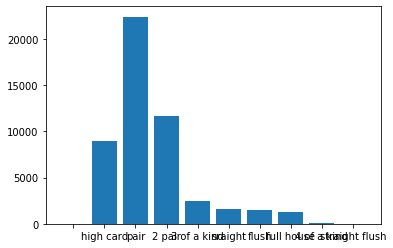

In [177]:
plt.bar(x=rankings, height=stats)

In [9]:
winnerStats = [0] * 10

In [10]:
def playRoundWinner(deck):
    np.random.shuffle(deck)
    hands, flop = distribute(deck)
    
    maxS = 0
    
    for hand in hands:
        s = judge_hand(flop, hand)
        maxS = max(s, maxS)
        
    winnerStats[maxS] += 1

In [11]:
players = 5

for j in range(10000):
    playRoundWinner(deck)

def showWinStats():
    total = sum(winnerStats)
    for i in range(len(winnerStats)):
        print(rankings[i], ':', winnerStats[i], '   ', 100.0*winnerStats[i]/total, '%')

In [13]:
showWinStats()

 : 0     0.0 %
high card : 27     0.27 %
pair : 2167     21.67 %
2 pair : 3507     35.07 %
3 of a kind : 1295     12.95 %
sraight : 1076     10.76 %
flush : 928     9.28 %
full house : 932     9.32 %
4 of a kind : 66     0.66 %
straight flush : 2     0.02 %


### Assuming 5 players - it becomes likely that the winner will have a 2 pair, 3 of a kind, straight, flush, or full house. This is because we assume that nobody folds, which is not very realistic. ###
### Below we can see how this changes if we assume 2 people will fold (three people left in the end). ###

In [14]:
players = 3

In [15]:
for j in range(10000):
    playRoundWinner(deck)

In [16]:
showWinStats()

 : 0     0.0 %
high card : 214     1.07 %
pair : 5317     26.585 %
2 pair : 6985     34.925 %
3 of a kind : 2304     11.52 %
sraight : 1849     9.245 %
flush : 1643     8.215 %
full house : 1570     7.85 %
4 of a kind : 114     0.57 %
straight flush : 4     0.02 %


<BarContainer object of 10 artists>

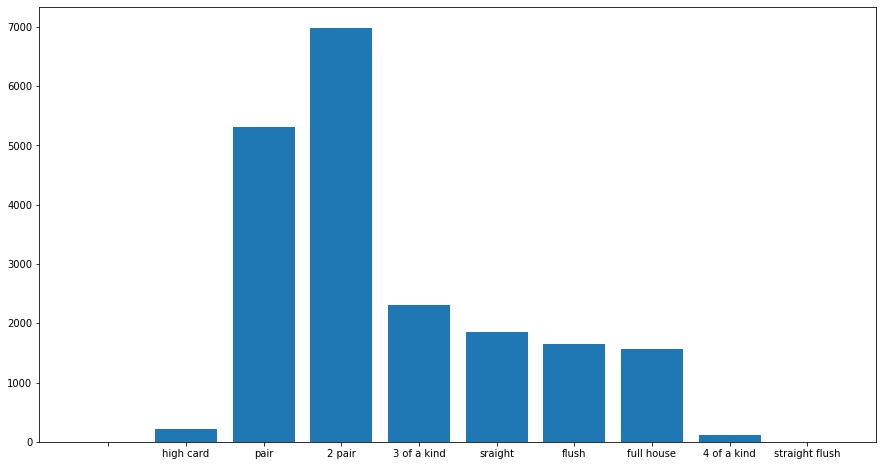

In [17]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(x=rankings, height=winnerStats)

### Next suppose we don't have anything on the flop. ###

In [18]:
# given nothing
players = 5
nothingStats = [0] * 10

def playNothingRound(deck):
    np.random.shuffle(deck)
    hands, flop = distribute(deck)
    
    for hand in hands:
        initial = judge_hand(flop[:3] + [(0, 1), (14, 2)] , hand)
        if initial == 1:
            s = judge_hand(flop, hand)
            nothingStats[s] += 1
    
            
for j in range(10000):
    playNothingRound(deck)
            
total = sum(nothingStats)
print (total / (players * 10000))
for i in range(1, len(nothingStats)):
    print(rankings[i], ':', nothingStats[i], '   ', 100.0*nothingStats[i]/total, '%')

0.48138
high card : 8642     35.905106153143045 %
pair : 11305     46.9691304167186 %
2 pair : 1997     8.296979517221322 %
3 of a kind : 332     1.3793676513357431 %
sraight : 1219     5.064605924633346 %
flush : 566     2.3515725622169596 %
full house : 0     0.0 %
4 of a kind : 0     0.0 %
straight flush : 8     0.03323777473098176 %


### Takeaways: 48% of the time, you won't have anything on the flop. If this is the case, there is still only a 36% chance that you will not have anything on the river. There is a 47% chance that you will get a pair, but the odds of getting something better are slim.  ###

<BarContainer object of 10 artists>

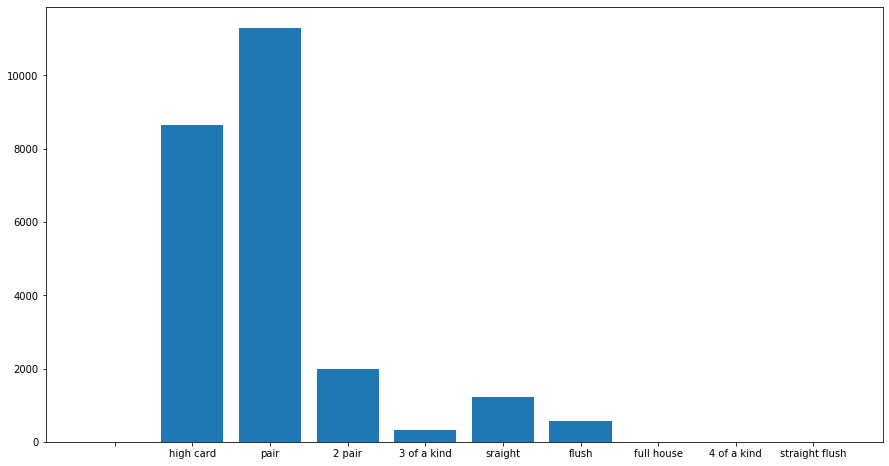

In [19]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(x=rankings, height=nothingStats)

### Finally, we consider a pocket pair. ###

In [20]:
# given nothing
players = 5
pocketStats = [0] * 10

def playPocketRound(deck):
    np.random.shuffle(deck)
    hands, flop = distribute(deck)
    
    for hand in hands:
        if hand[0][0] == hand[1][0]: # pocket pair.
            s = judge_hand(flop, hand)
            pocketStats[s] += 1
    
for j in range(100000):
    playPocketRound(deck)
            
total = sum(pocketStats)
print (total / (players * 100000))
for i in range(1, len(pocketStats)):
    print(rankings[i], ':', pocketStats[i], '   ', 100.0*pocketStats[i]/total, '%')

0.0582
high card : 0     0.0 %
pair : 10556     36.27491408934708 %
2 pair : 11484     39.4639175257732 %
3 of a kind : 3493     12.003436426116838 %
sraight : 237     0.8144329896907216 %
flush : 559     1.9209621993127148 %
full house : 2528     8.687285223367697 %
4 of a kind : 243     0.8350515463917526 %
straight flush : 0     0.0 %


### This has a 6% probability of occurring. Very good odds, only 36% chance that you end with just that pair. 40% chance of getting a 2 pair, 20%+ chance of getting a 3 of a kind or better.  ###

<BarContainer object of 10 artists>

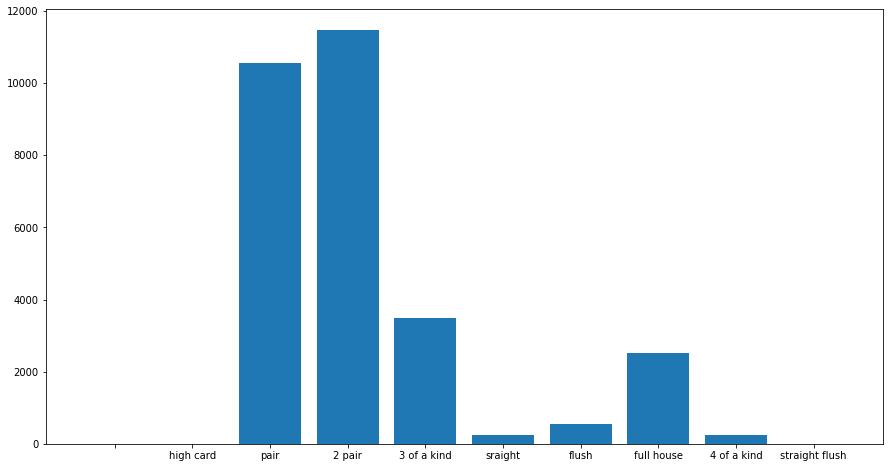

In [21]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(x=rankings, height=pocketStats)

## Thank You! ##